# Data Mining


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [100]:
# Parameters
n_samples, n_timestamps = 100, 366

In [101]:
# Toy dataset
df= pd.read_csv('WH90_17.csv')
df_Series=df.iloc[:,0]
dataset = df_Series.values
dataset=dataset.reshape(1, 366)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
dataset = scaler.fit_transform(dataset)
#rng = np.random.RandomState(41)
X = dataset

In [102]:
# SAX transformation
n_bins = 3
sax = SymbolicAggregateApproximation(n_segments= 12,  alphabet_size_avg=n_bins)
X_sax = sax.inverse_transform(sax.fit_transform(X))


In [103]:
# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

In [104]:
# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [105]:
print(bottom_bool)

[ True False False False  True False  True  True False False False False
 False  True False  True False  True False False False False  True False]


/home/fethi/notebook/jupyterenv/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


NameError: name 'mlines' is not defined

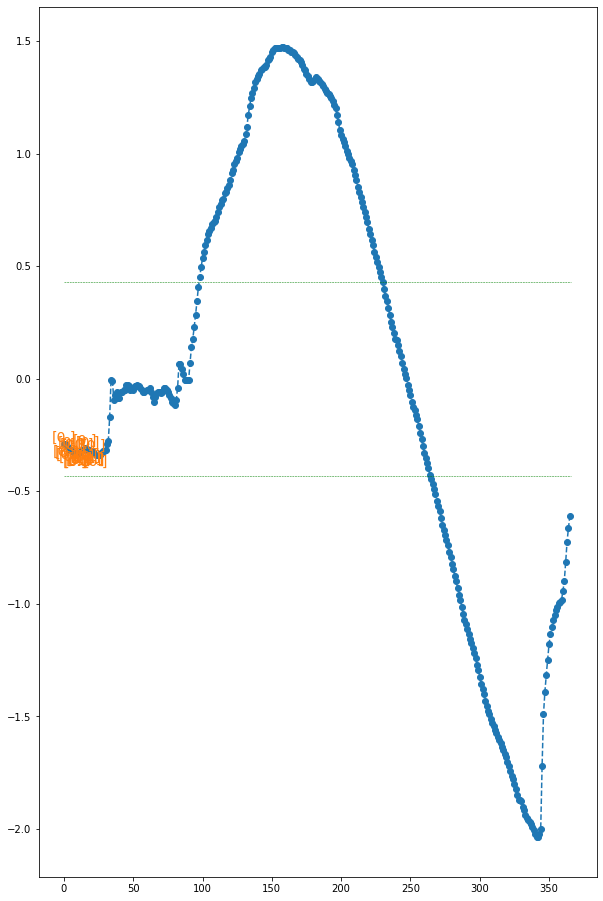

In [107]:
plt.figure(figsize=(10, 16))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()